In [3]:
# Import core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset into a pandas DataFrame
df = pd.read_csv('loan_approval_dataset.csv')

In [4]:
new_column_names = {
    ' no_of_dependents': 'no_of_dependents',
    ' education': 'education',
    ' self_employed': 'self_employed',
    ' income_annum': 'income_annum',
    ' loan_amount': 'loan_amount',
    ' loan_term': 'loan_term',
    ' cibil_score': 'cibil_score',
    ' residential_assets_value': 'residential_assets_value',
    ' commercial_assets_value': 'commercial_assets_value',
    ' luxury_assets_value': 'luxury_assets_value',
    ' bank_asset_value': 'bank_asset_value',
    ' loan_status': 'loan_status'
}
df.rename(columns=new_column_names, inplace=True)

In [5]:
print(df.head())

   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           80

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
print(df.describe())

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06       

In [8]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')



--- Loan Status Distribution ---
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


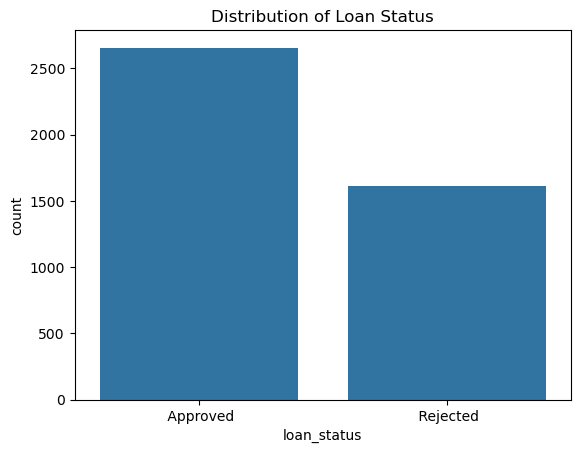

In [9]:
# Count of Approved vs. Rejected Loans
print("\n--- Loan Status Distribution ---")
print(df['loan_status'].value_counts())
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

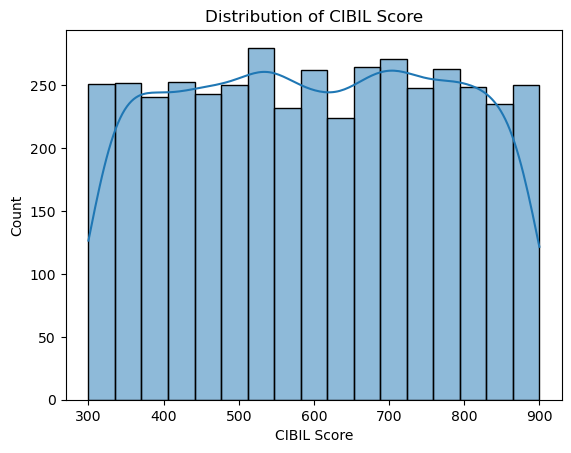

In [10]:
# Distribution of CIBIL Scores
sns.histplot(df['cibil_score'], kde=True)
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.show()

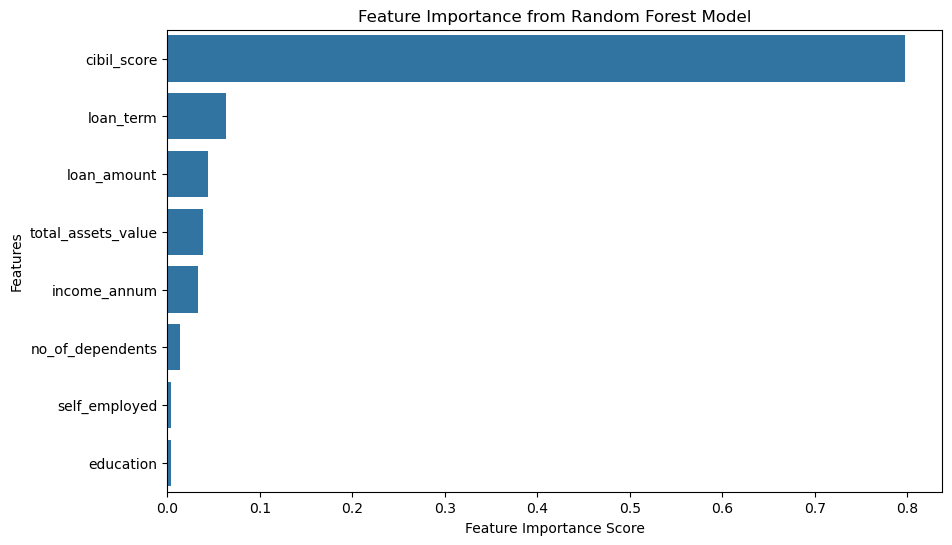

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Create a Series with feature names and their importance
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

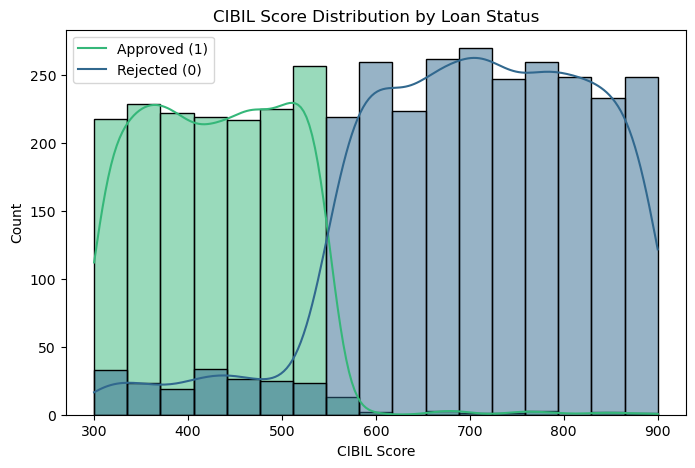

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CIBIL Score, separated by Loan Status
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df, 
    x='cibil_score', 
    hue='loan_status', # 0: Rejected, 1: Approved
    kde=True, 
    palette='viridis'
)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.legend(labels=['Approved (1)', 'Rejected (0)'])
plt.show()

### Data cleaning

In [11]:
# Drop the 'loan_id' column as it is a unique identifier and not useful for prediction
df = df.drop('loan_id', axis=1)

In [12]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [13]:
print("Columns after removing 'loan_id':")
print(df.columns)

Columns after removing 'loan_id':
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [14]:
le = LabelEncoder()

In [15]:
# Encode 'education' column
df['education'] = le.fit_transform(df['education'])

In [16]:
# Encode 'self_employed' column
df['self_employed'] = le.fit_transform(df['self_employed'])

In [17]:
# Encode 'loan_status' column (this is our target variable)
df['loan_status'] = le.fit_transform(df['loan_status'])

In [18]:
print("\n--- DataFrame after Encoding Categorical Variables ---")
print(df.head())
print(df.info())


--- DataFrame after Encoding Categorical Variables ---
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   lux

### Extracting New Features

In [ ]:
# Create a new feature 'total_assets_value' by summing the four asset columns.
df['total_assets_value'] = (
    df['residential_assets_value'] + 
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)

In [20]:
# You can now drop the individual asset columns if you want, as they are now represented by the new feature.
df = df.drop([
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
], axis=1)

In [21]:
print("\n--- DataFrame after Feature Engineering ---")
print(df.head())


--- DataFrame after Feature Engineering ---
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  loan_status  total_assets_value  
0         12          778            0            50700000  
1          8          417            1            17000000  
2         20          506            1            57700000  
3          8          467            1            52700000  
4         20          382            1            55000000  


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   no_of_dependents    4269 non-null   int64
 1   education           4269 non-null   int64
 2   self_employed       4269 non-null   int64
 3   income_annum        4269 non-null   int64
 4   loan_amount         4269 non-null   int64
 5   loan_term           4269 non-null   int64
 6   cibil_score         4269 non-null   int64
 7   loan_status         4269 non-null   int64
 8   total_assets_value  4269 non-null   int64
dtypes: int64(9)
memory usage: 300.3 KB
None


In [23]:
df.size

38421

In [24]:
df.isnull().sum()

no_of_dependents      0
education             0
self_employed         0
income_annum          0
loan_amount           0
loan_term             0
cibil_score           0
loan_status           0
total_assets_value    0
dtype: int64

#### Prepare Data for Modeling

In [26]:
df['loan_status'].unique()

array([0, 1])

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 3415 samples
Testing set size: 854 samples


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
print("\n--- Training Model ---")
model.fit(X_train, y_train)
print("Model training complete.")


--- Training Model ---
Model training complete.


#### Model Evaluation

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
# Print evaluation metrics
print("\n--- Model Performance ---")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report (Precision, Recall, F1-Score):")
print(class_report)


--- Model Performance ---
Accuracy: 0.9801

Confusion Matrix:
[[527   4]
 [ 13 310]]

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

